# Assignment 2. Heart rate detection
Hardware 1 - Orientation to Health Technology<br>
Your name: **Rene Kilpeläinen**<br>
Date returned: **8.9.2024**<br>
Metropolia University of Applied Sciences<br>

## 1. Setup

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import heartpy as hp

## 2. All data
Read in and plot all data.

In [10]:
# Reads the file into a numpy array
data = hp.get_data('capture01_250Hz.txt')
# Create a time vector
Fs = 250 # Sampling rate (samples per second)
time = np.arange(len(data))/Fs

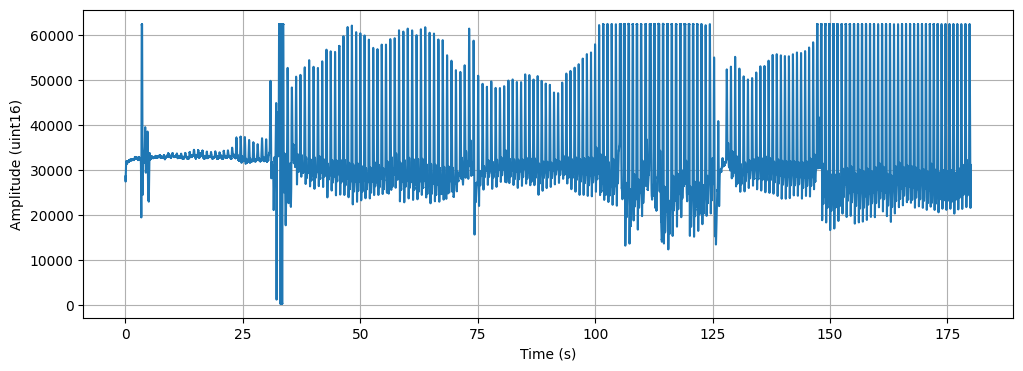

In [11]:
# Plot the whole data in a graphical figure
plt.figure(figsize = (12, 4))
plt.plot(time, data)
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (uint16)')
plt.show()

## 3. Selected segment
Select a **60 seconds** segment from the data and make a graph of it.

Segment starts from: 80 s


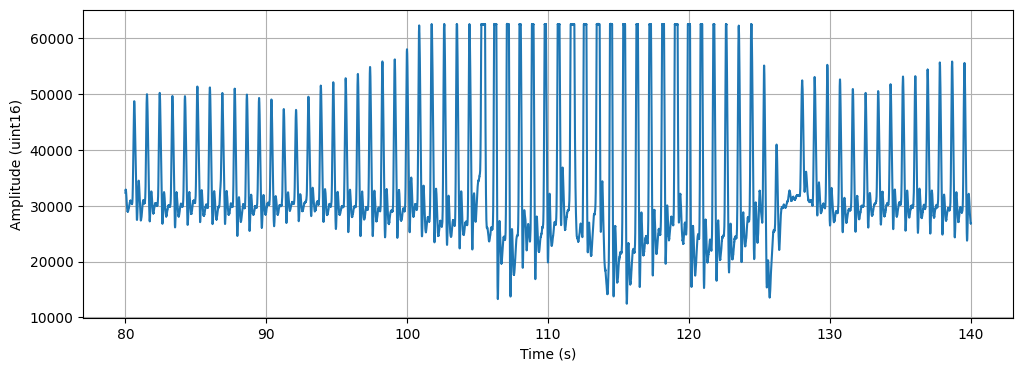

In [12]:
# Your c# Random seed based on the last four digits of the student ID number
np.random.seed(1728)
t0 = np.random.randint(30, 100)
print(f'Segment starts from: {t0} s')

# Select a segment
i = (t0 < time) & (time < t0 + 60)
data2 = data[i]
time2 = time[i]

# Plot the selected segment
plt.figure(figsize = (12, 4))
plt.plot(time2, data2)
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (uint16)')
plt.show()

## 4. Peak detection and HRV measurements
Detect the peaks from the selected segment of data, make a graph of the processed data segment to show the peaks, and finally display the measures computed.

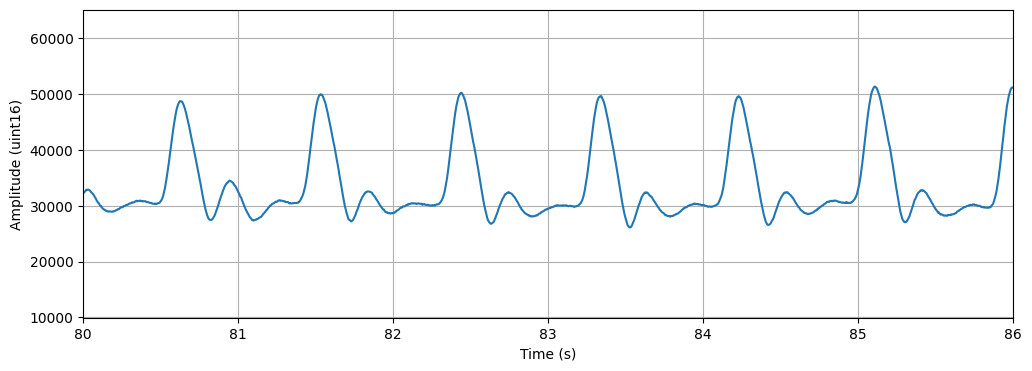

In [13]:
# Zoom in to the first 6 seconds to show the details of the signal

# Plot the selected segment
plt.figure(figsize = (12, 4))
plt.plot(time2, data2)
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (uint16)')
plt.xlim(t0, t0 + 6)
plt.show()


<Figure size 1200x400 with 0 Axes>

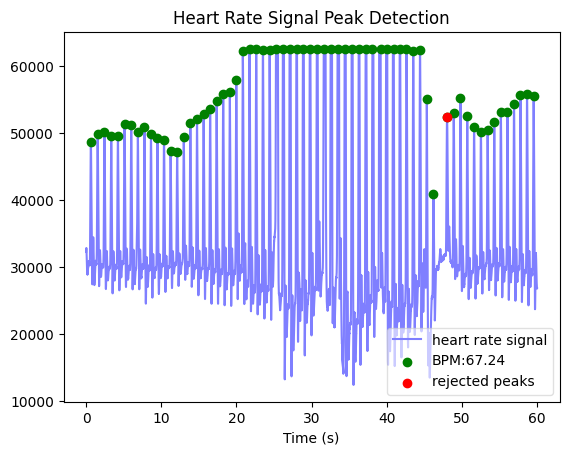

In [14]:
working_data, measures = hp.process(data2, sample_rate=Fs)
plt.figure(figsize = (12, 4))

hp.plotter(working_data, measures)

In [15]:
for measure in measures.keys():
    print('%s: %f' % (measure, measures[measure]))

bpm: 67.240643
ibi: 892.317460
sdnn: 35.587061
sdsd: 39.349071
rmssd: 47.582887
pnn20: 0.327869
pnn50: 0.180328
hr_mad: 12.000000
sd1: 33.641581
sd2: 38.391189
s: 4057.493475
sd1/sd2: 0.876284
breathingrate: 0.266667


## 5. Interpretations
Interpret the results.

**1.** The average measured heart rate is 67 BPM. The reading is pretty average, meaning that the person in question is in a relaxed state.

**2.** The average measured inter-beat-interval (IBI) is 892 ms, which means that the IBI is on the lower end. 

**3.** The gathered measurements mostly fall into the average category. However, the RMSSD value seems to be a bit higher (47.6). This would most likely mean that the person in question is in a physically good shape for their age.

**4.** With all the provided results combined, it would seem that the person is in a pretty average state. The recovery and stress levels are pretty normal. 